| Feature            | Explain                                                                 |
|--------------------|-------------------------------------------------------------------------|
| fixed acidity      | most acids involved with wine or fixed or nonvolatile                   |
| volatile acidity   | the amount of acetic acid in wine                                       |
| citric acid        | the amount of citric acid in wine                                       |
| residual sugar     | the amount of sugar remaining after fermentation stops                  |
| chlorides          | the amount of salt in the wine                                          |
| free sulfur dioxide| the amount of free sulfur dioxide in the wine (those available to react and thus exhibit both germicidal and antioxidant properties) |
| total sulfur dioxide | amount of free and bound forms of SO2                              |
| density            | the measurement of how tightly a material is packed together            |
| pH                 | describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 |
| alcohol            | the percent alcohol content of the wine                                 |
| quality            | output variable (based on sensory data, score between 3 and 8)          |

In [1]:
# Import required libreries
import numpy as np
import pandas as pd
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, LeakyReLU,ReLU, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Reading the Dataset
df=pd.read_csv('/content/drive/MyDrive/DL/winequality-red.csv')

In [4]:
df


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [5]:
#Dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
df.shape

(1599, 12)

In [7]:
# Missing values
df.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [8]:
# Generate descriptive statistics for all columns to understand the Dataset
df.describe(include='all').T.style.background_gradient(axis=0)

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.000000,8.319637,1.741096,4.600000,7.100000,7.900000,9.200000,15.900000
volatile acidity,1599.000000,0.527821,0.179060,0.120000,0.390000,0.520000,0.640000,1.580000
citric acid,1599.000000,0.270976,0.194801,0.000000,0.090000,0.260000,0.420000,1.000000
residual sugar,1599.000000,2.538806,1.409928,0.900000,1.900000,2.200000,2.600000,15.500000
chlorides,1599.000000,0.087467,0.047065,0.012000,0.070000,0.079000,0.090000,0.611000
free sulfur dioxide,1599.000000,15.874922,10.460157,1.000000,7.000000,14.000000,21.000000,72.000000
total sulfur dioxide,1599.000000,46.467792,32.895324,6.000000,22.000000,38.000000,62.000000,289.000000
density,1599.000000,0.996747,0.001887,0.990070,0.995600,0.996750,0.997835,1.003690
pH,1599.000000,3.311113,0.154386,2.740000,3.210000,3.310000,3.400000,4.010000
sulphates,1599.000000,0.658149,0.169507,0.330000,0.550000,0.620000,0.730000,2.000000


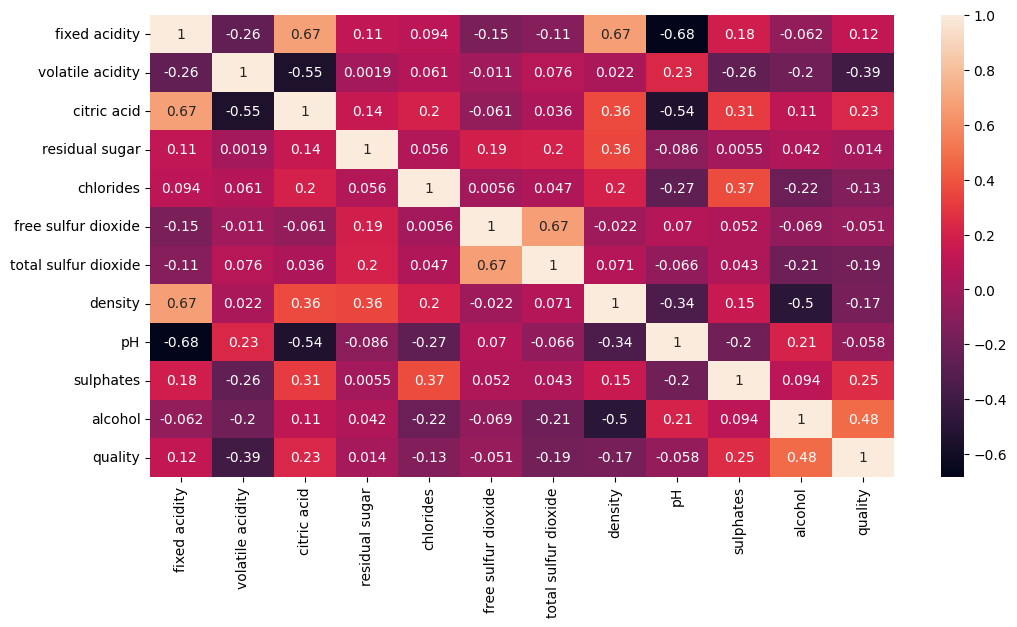

In [9]:
# Plot a heatmap of the correlation matrix for all numeric features in the Dataset
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),annot=True)
plt.show()

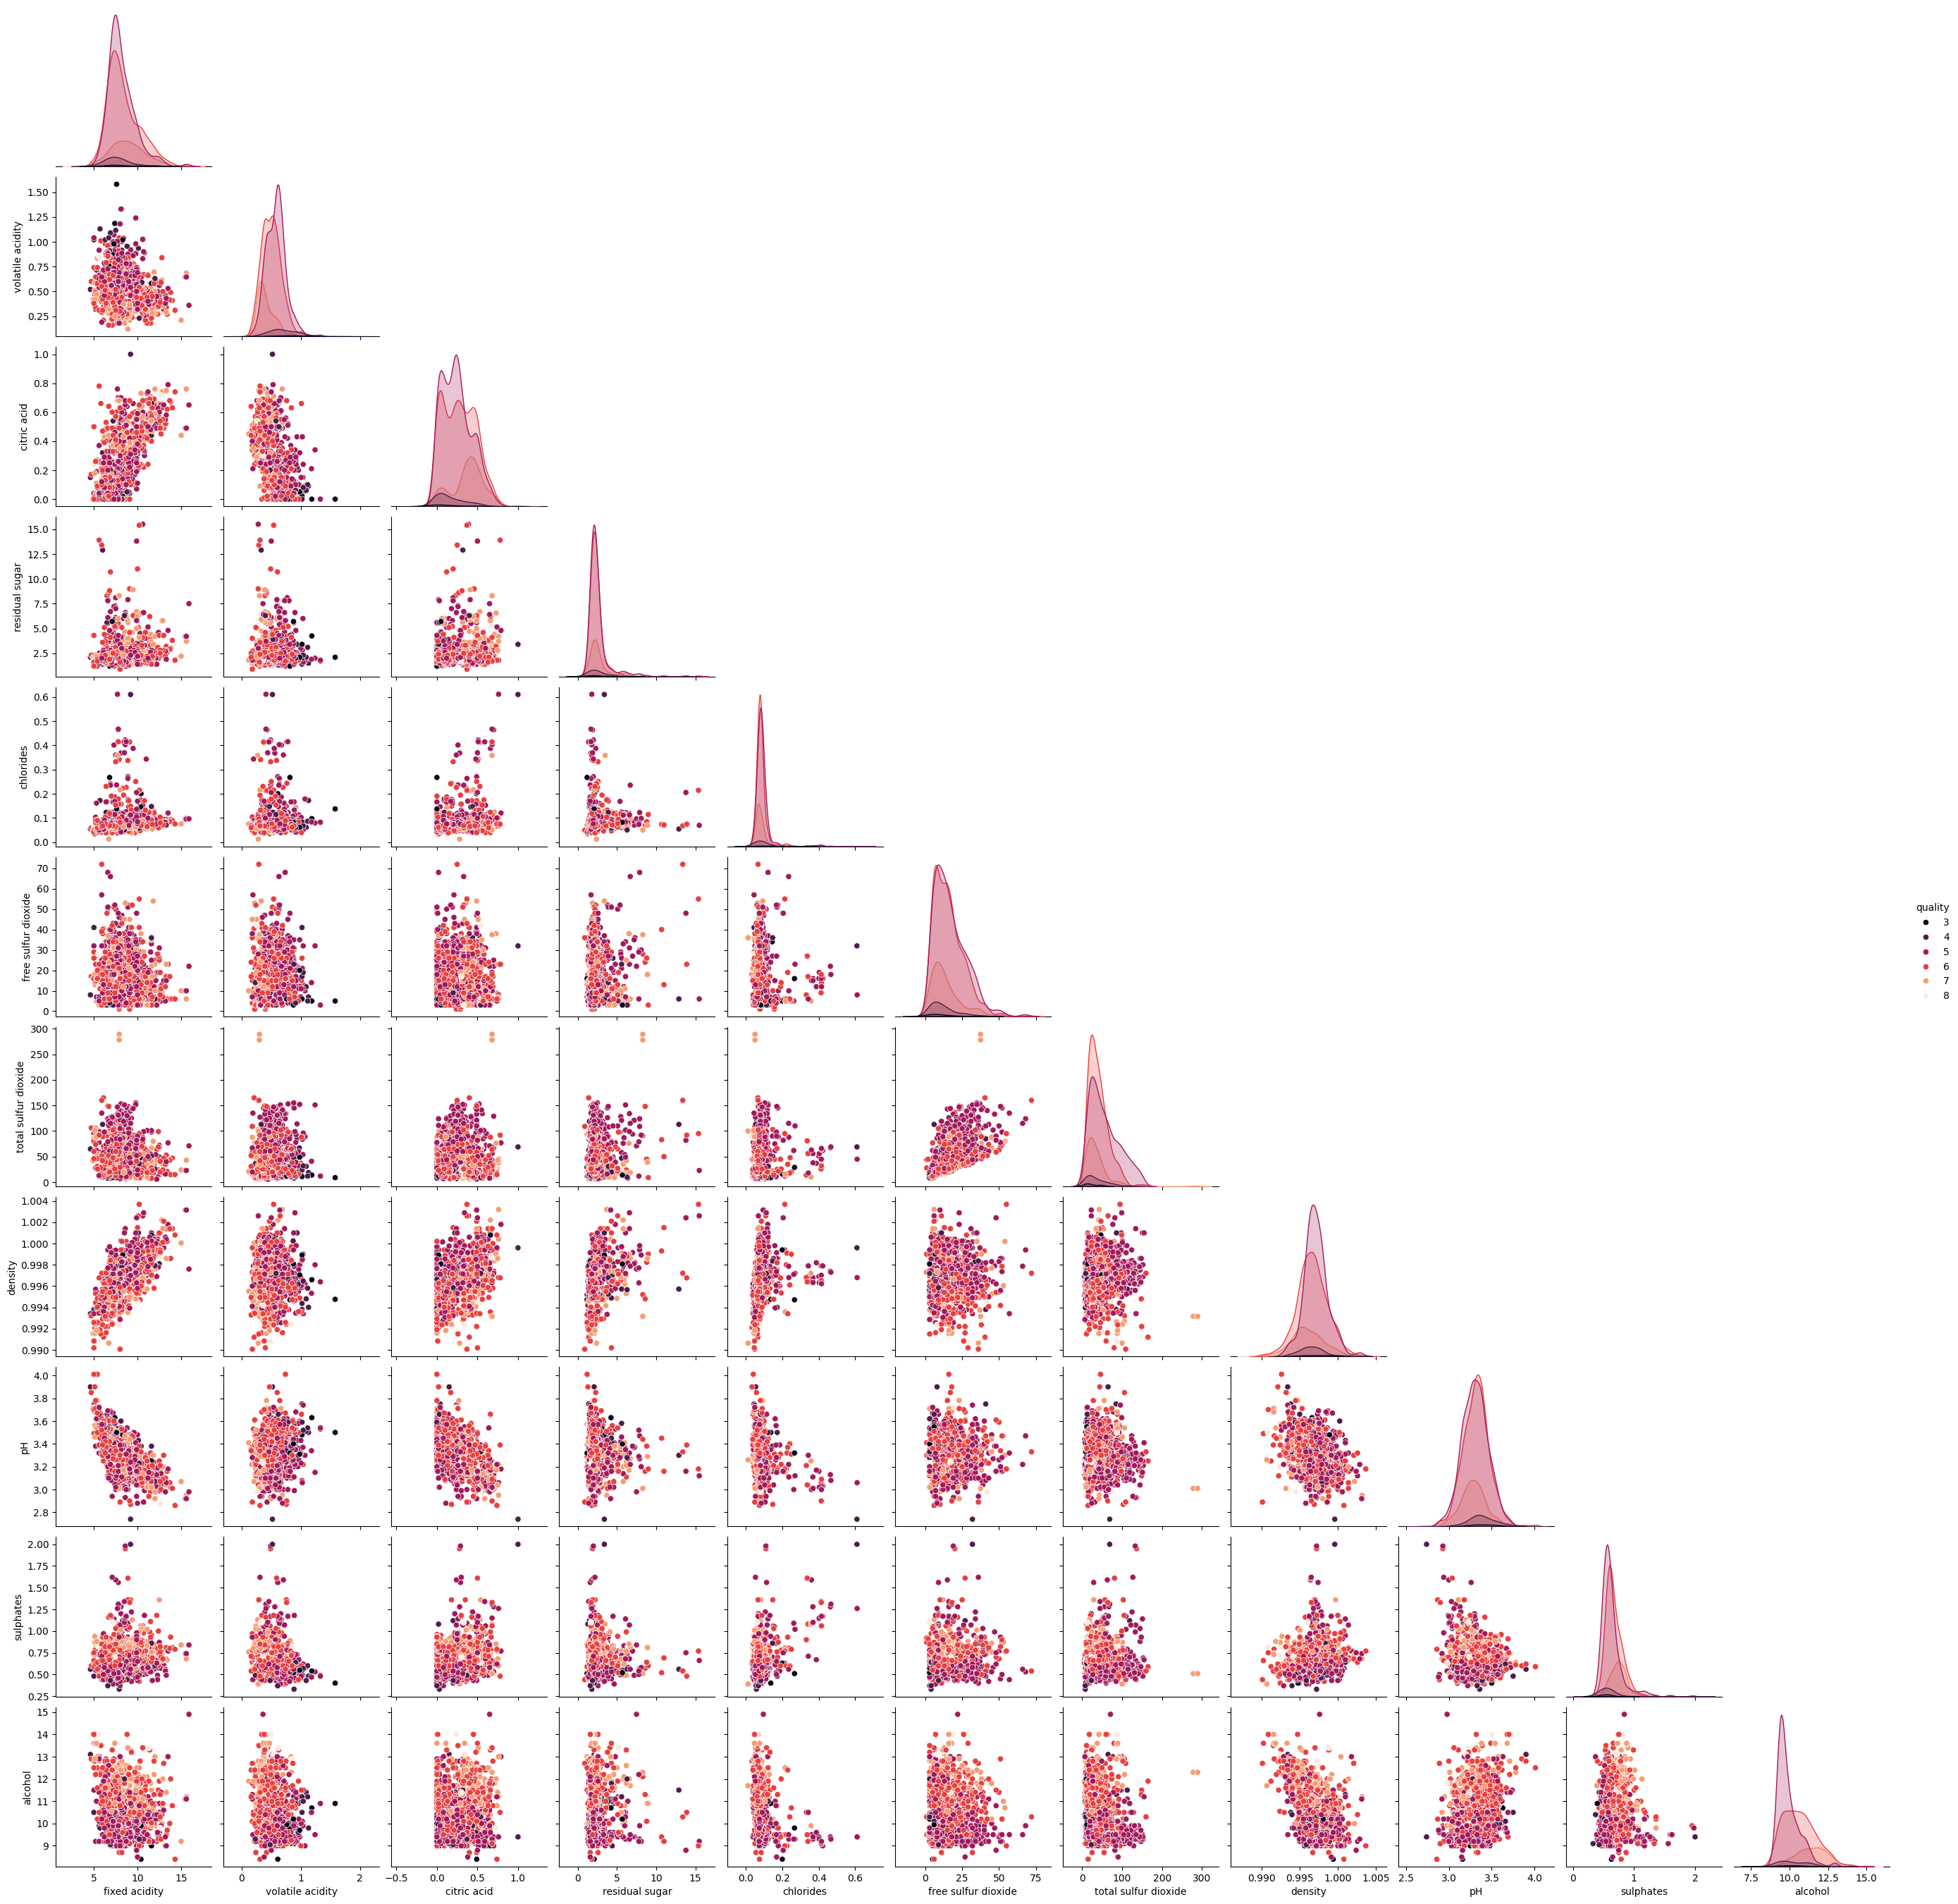

In [10]:
sns.pairplot(df, hue='quality', corner = True, palette='rocket')

In [11]:
# Check the number of duplicate rows
df.duplicated().sum()

np.int64(240)

In [12]:
# Remove duplicate rows
df.drop_duplicates(inplace=True)

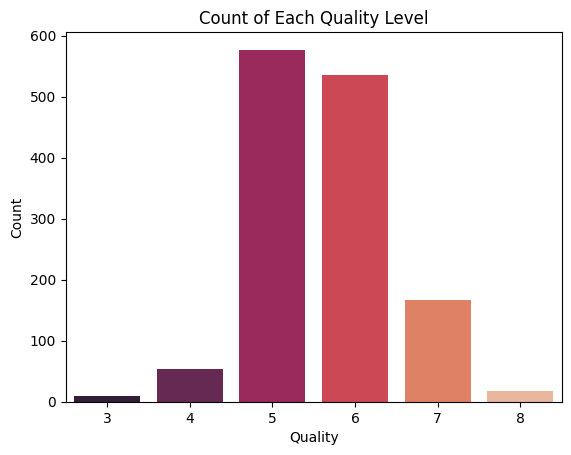

In [13]:
# Countplot for quality
sns.countplot(x='quality',data=df,palette='rocket')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.title('Count of Each Quality Level')
plt.show()

In [14]:
# Create a new column 'quality_label' based on 'quality'

df['quality_label'] = df['quality'].apply(lambda x: 'Low' if x in [3, 4, 5] else 'High')

#Check
df[['quality', 'quality_label']].head(10)

,quality,quality_label
0,5,Low
1,5,Low
2,5,Low
3,6,High
5,5,Low
6,5,Low
7,7,High
8,7,High
9,5,Low
10,5,Low


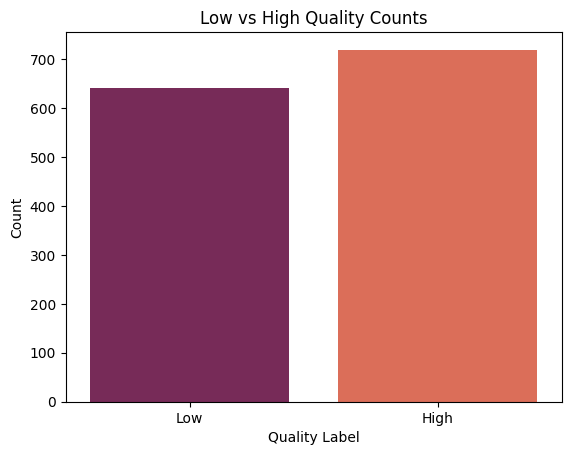

In [15]:
# Countplot for quality_label
sns.countplot(x='quality_label', data=df, palette='rocket')
plt.xlabel('Quality Label')
plt.ylabel('Count')
plt.title('Low vs High Quality Counts')
plt.show()

In [16]:
# Create a new column 'alcohol_content' based on 'alcohol'

bins = [df['alcohol'].min()-1, 9.75, 11, df['alcohol'].max()+1]
labels = ['Low', 'Medium', 'High']

df['alcohol_content'] = pd.cut(df['alcohol'], bins=bins, labels=labels)

#Check
df[['alcohol', 'alcohol_content']].head(20)

,alcohol,alcohol_content
0,9.4,Low
1,9.8,Medium
2,9.8,Medium
3,9.8,Medium
5,9.4,Low
6,9.4,Low
7,10.0,Medium
8,9.5,Low
9,10.5,Medium
10,9.2,Low


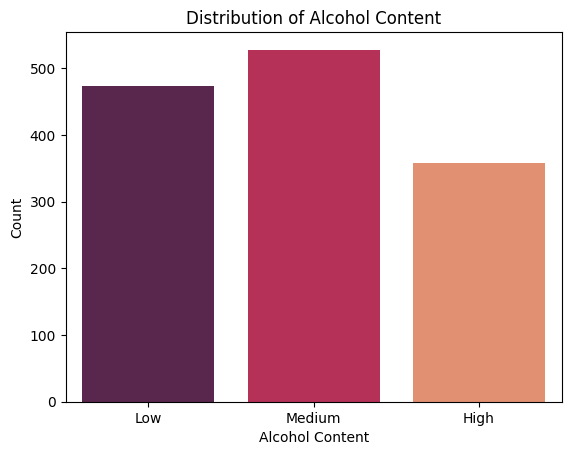

In [17]:
# Countplot for alcohol_content
sns.countplot(x='alcohol_content', data=df, palette='rocket')
plt.xlabel('Alcohol Content')
plt.ylabel('Count')
plt.title('Distribution of Alcohol Content')
plt.show()

In [18]:
# Create a new column 'citric_acid_binary' based on 'citric acid'

df['citric_acid_binary'] = df['citric acid'].apply(lambda x: 0 if x <= 0.26 else 1)

# Check
df[['citric acid', 'citric_acid_binary']].head(10)

,citric acid,citric_acid_binary
0,0.00,0
1,0.00,0
2,0.04,0
3,0.56,1
5,0.00,0
6,0.06,0
7,0.00,0
8,0.02,0
9,0.36,1
10,0.08,0


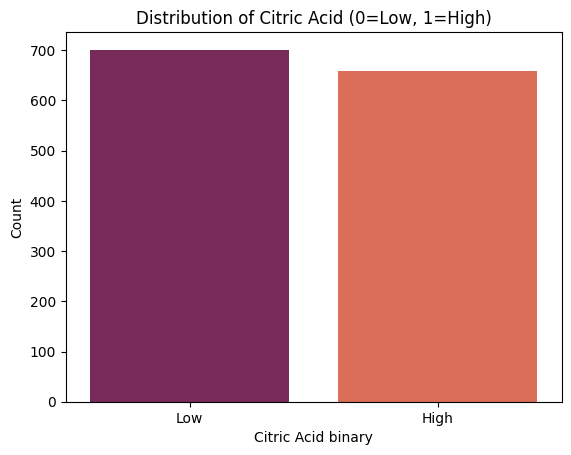

In [19]:
# Countplot for citric_acid_binary
sns.countplot(x='citric_acid_binary', data=df, palette='rocket')
plt.xlabel('Citric Acid binary')
plt.ylabel('Count')
plt.title('Distribution of Citric Acid (0=Low, 1=High)')
plt.xticks([0,1], ['Low', 'High'])  # optional: label 0/1 as Low/High
plt.show()

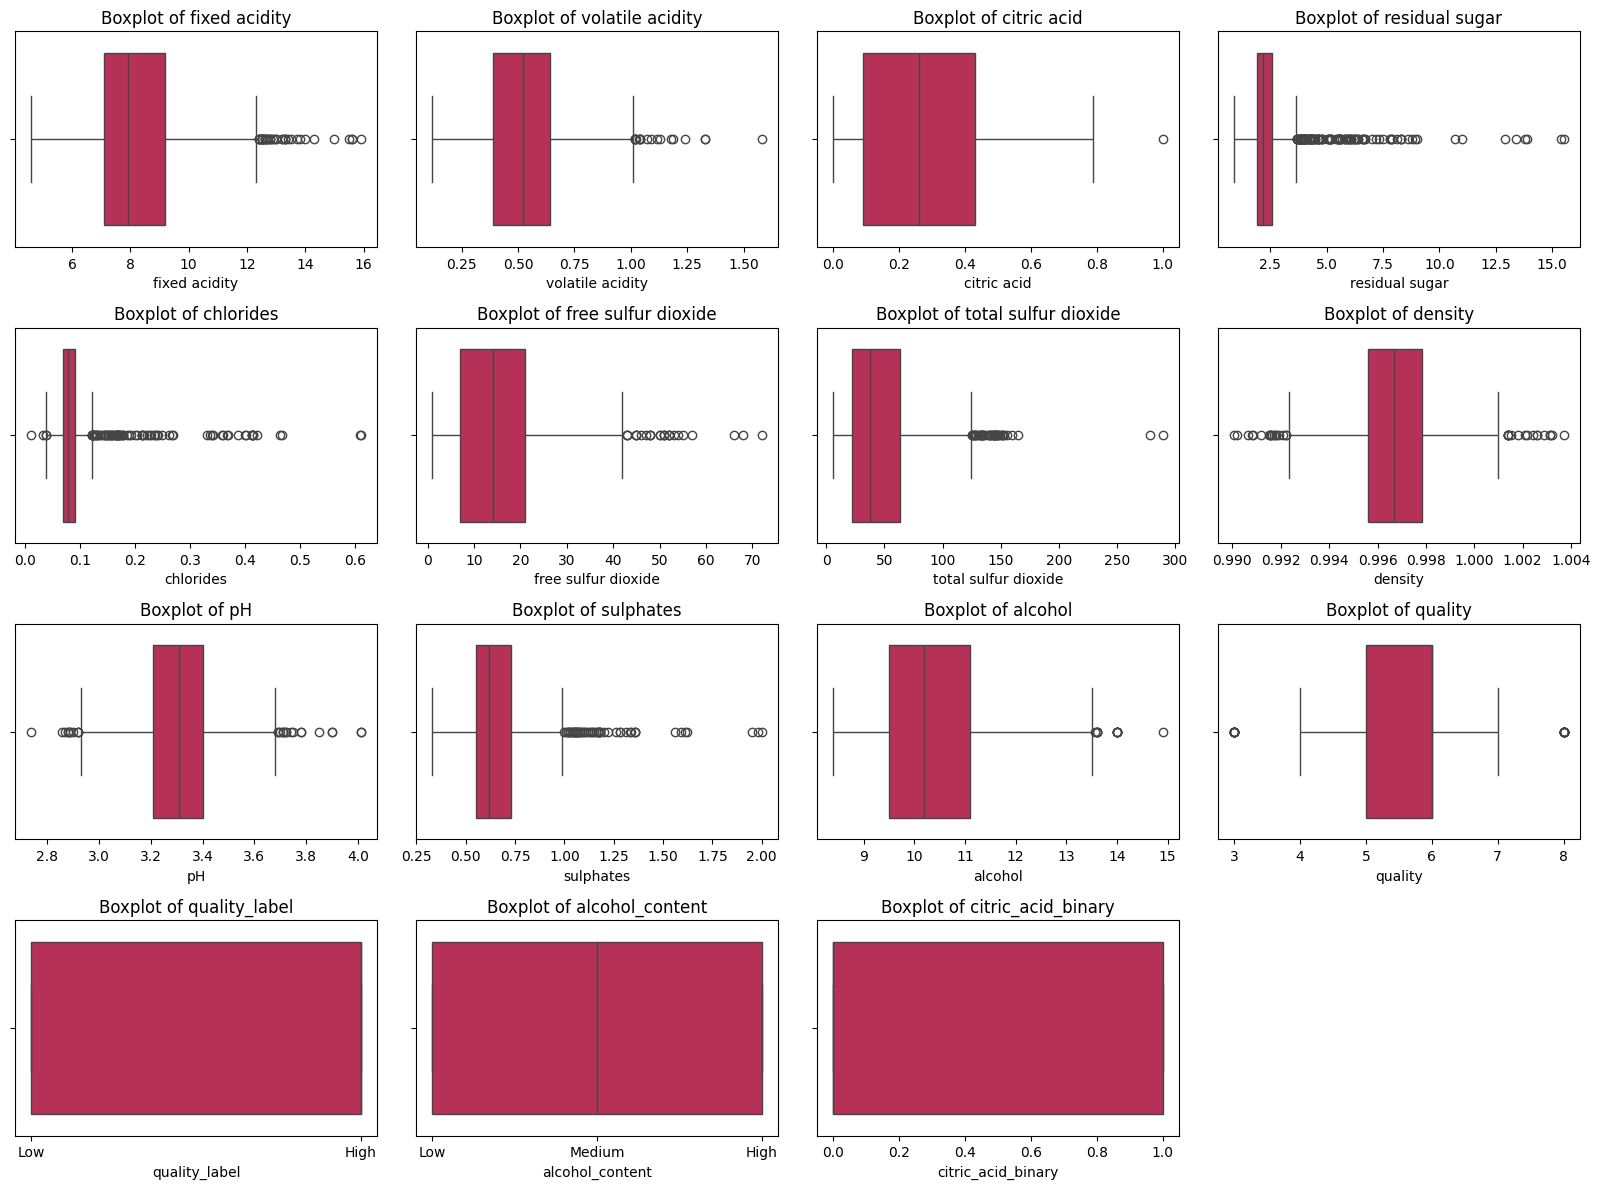

In [20]:
# Get the number of columns in the dataframe
num_cols = len(df.columns)

# Determine the number of rows and columns for the subplots
num_rows = (num_cols + 3) // 4 # Adjust based on desired number of columns per row
num_cols_per_row = 4 # You can change this number

plt.figure(figsize=(num_cols_per_row * 4, num_rows * 3))  # Adjust figure size

for i, col in enumerate(df.columns):
    plt.subplot(num_rows, num_cols_per_row, i + 1)
    sns.boxplot(x=df[col], palette='rocket')
    plt.title(f"Boxplot of {col}")

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

In [21]:
import pandas as pd

# Function to count outliers
def count_outliers(df):
    outlier_counts = {}
    for col in df.columns:
        if pd.api.types.is_numeric_dtype(df[col]):  # only numeric columns
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
            outlier_counts[col] = outliers.shape[0]
    return outlier_counts


# Function to replace outliers with mean
def replace_outliers_with_mean(df):
    df_copy = df.copy()
    for col in df_copy.columns:
        if pd.api.types.is_numeric_dtype(df_copy[col]):
            Q1 = df_copy[col].quantile(0.25)
            Q3 = df_copy[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            mean_val = df_copy[col].mean()

            # Replace outliers with mean
            df_copy.loc[(df_copy[col] < lower_bound) | (df_copy[col] > upper_bound), col] = mean_val
    return df_copy


# Example: before & after
print("Before replacement:\n")
print(pd.DataFrame(list(count_outliers(df).items()), columns=['Feature', 'Outlier Count']))

df_replaced = replace_outliers_with_mean(df)

print("\nAfter replacement:\n")
print(pd.DataFrame(list(count_outliers(df_replaced).items()), columns=['Feature', 'Outlier Count']))


Before replacement:

                 Feature  Outlier Count
0          fixed acidity             41
1       volatile acidity             19
2            citric acid              1
3         residual sugar            126
4              chlorides             87
5    free sulfur dioxide             26
6   total sulfur dioxide             45
7                density             35
8                     pH             28
9              sulphates             55
10               alcohol             12
11               quality             27
12    citric_acid_binary              0

After replacement:

                 Feature  Outlier Count
0          fixed acidity             24
1       volatile acidity              4
2            citric acid              0
3         residual sugar             11
4              chlorides             33
5    free sulfur dioxide              0
6   total sulfur dioxide             26
7                density              6
8                     pH              

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1359 entries, 0 to 1598
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   fixed acidity         1359 non-null   float64 
 1   volatile acidity      1359 non-null   float64 
 2   citric acid           1359 non-null   float64 
 3   residual sugar        1359 non-null   float64 
 4   chlorides             1359 non-null   float64 
 5   free sulfur dioxide   1359 non-null   float64 
 6   total sulfur dioxide  1359 non-null   float64 
 7   density               1359 non-null   float64 
 8   pH                    1359 non-null   float64 
 9   sulphates             1359 non-null   float64 
 10  alcohol               1359 non-null   float64 
 11  quality               1359 non-null   int64   
 12  quality_label         1359 non-null   object  
 13  alcohol_content       1359 non-null   category
 14  citric_acid_binary    1359 non-null   int64   
dtypes: catego

In [24]:
df= df.copy()

# Identify non-numeric columns
non_numeric_cols = df.select_dtypes(include=['object', 'category']).columns

# Initialize dictionary to store encoders
label_encoders = {}

# Convert each non-numeric column to numeric
for col in non_numeric_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # store encoder for possible inverse transformation

# Check result
print(df.head(50))
print(df.dtypes)

    fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0             7.4             0.700         0.00             1.9      0.076   
1             7.8             0.880         0.00             2.6      0.098   
2             7.8             0.760         0.04             2.3      0.092   
3            11.2             0.280         0.56             1.9      0.075   
5             7.4             0.660         0.00             1.8      0.075   
6             7.9             0.600         0.06             1.6      0.069   
7             7.3             0.650         0.00             1.2      0.065   
8             7.8             0.580         0.02             2.0      0.073   
9             7.5             0.500         0.36             6.1      0.071   
10            6.7             0.580         0.08             1.8      0.097   
12            5.6             0.615         0.00             1.6      0.089   
13            7.8             0.610         0.29    

In [25]:
# Features (excluding citric acid,alcohol and quality), Targets: quality_label, alcohol_content and citric_acid_binary
features=['fixed acidity', 'volatile acidity', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates']
X=df[features].values
y_quality=df['quality_label'].values
y_alcohol=df['alcohol_content'].values
y_citric_acid=df['citric_acid_binary'].values

In [26]:
# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [27]:
# Split into train and test sets
X_train, X_test, \
y_quality_train, y_quality_test, \
y_alcohol_train, y_alcohol_test, \
y_citric_acid_train, y_citric_acid_test = train_test_split(
    X_scaled,
    y_quality,
    y_alcohol,
    y_citric_acid,
    test_size=0.2,
    random_state=42
)

In [37]:
# Build multi-output model
input_layer = Input(shape=(X_train.shape[1],), name='Input')

weight_decay = 0.001
x = Dense(128, activation='relu', kernel_regularizer=l2(weight_decay))(input_layer)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)
x = Dense(64, activation='relu', kernel_regularizer=l2(weight_decay))(x)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)
x = Dense(32, activation='leaky_relu', kernel_regularizer=l2(weight_decay))(x)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)
x = Dense(16, activation='relu', kernel_regularizer=l2(weight_decay))(x) # Added layer
x = BatchNormalization()(x)
x = Dropout(0.5)(x)

In [38]:
# Output 1: Binary classification (quality_label)
output1 = Dense(1, activation='sigmoid', name='quality')(x)

# Output 2: Multi-class classification (alcohol_content: 3 classes)
output2 = Dense(3, activation='softmax', name='alcohol')(x)

# Output 3: Binary classification (citric_acid_binary)
output3 = Dense(1, activation='sigmoid', name='citric_acid')(x)

# Create model
model = Model(inputs=input_layer, outputs=[output1, output2, output3])


In [39]:
# Define optimizer with a custom learning rate
optimizer = Adam(learning_rate=0.001)  # set your desired learning rate

# Compile the model
model.compile(
    optimizer=optimizer,
    loss={
        'quality': 'binary_crossentropy',
        'alcohol': 'sparse_categorical_crossentropy',
        'citric_acid': 'binary_crossentropy'
    },
    metrics={
        'quality': 'accuracy',
        'alcohol': 'accuracy',
        'citric_acid': 'accuracy'
        }
)
print(model.summary())

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ Input (InputLayer)  │ (None, 9)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 128)       │      1,280 │ Input[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 128)       │        512 │ dense_3[0][0]     │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_3 (Dropout) │ (None, 128)       │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 64)        │      8,256 │ dropout_3[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 64)        │        256 │ dense_4[0][0]     │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_4 (Dropout) │ (None, 64)        │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_5 (Dense)     │ (None, 32)        │      2,080 │ dropout_4[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32)        │        128 │ dense_5[0][0]     │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_5 (Dropout) │ (None, 32)        │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_6 (Dense)     │ (None, 16)        │        528 │ dropout_5[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 16)        │         64 │ dense_6[0][0]     │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_6 (Dropout) │ (None, 16)        │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ quality (Dense)     │ (None, 1)         │         17 │ dropout_6[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ alcohol (Dense)     │ (None, 3)         │         51 │ dropout_6[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ citric_acid (Dense) │ (None, 1)         │         17 │ dropout_6[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 13,189 (51.52 KB)

 Trainable params: 12,709 (49.64 KB)

 Non-trainable params: 480 (1.88 KB)

None


In [40]:
# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

In [41]:
# Train model with validation split
history = model.fit(X_train,
                    {'quality': y_quality_train, 'alcohol': y_alcohol_train,'citric_acid':y_citric_acid_train },
                    validation_split=0.2,
                    epochs=150,
                    batch_size=16,
                    callbacks=[early_stopping],
                    verbose=2)

Epoch 1/150
55/55 - 6s - 107ms/step - alcohol_accuracy: 0.4097 - alcohol_loss: 1.4479 - citric_acid_accuracy: 0.6087 - citric_acid_loss: 0.7853 - loss: 3.2475 - quality_accuracy: 0.5132 - quality_loss: 0.8451 - val_alcohol_accuracy: 0.5275 - val_alcohol_loss: 1.0028 - val_citric_acid_accuracy: 0.6560 - val_citric_acid_loss: 0.6382 - val_loss: 2.5024 - val_quality_accuracy: 0.5000 - val_quality_loss: 0.6936
Epoch 2/150
55/55 - 1s - 12ms/step - alcohol_accuracy: 0.4476 - alcohol_loss: 1.2199 - citric_acid_accuracy: 0.7100 - citric_acid_loss: 0.6204 - loss: 2.7827 - quality_accuracy: 0.5466 - quality_loss: 0.7717 - val_alcohol_accuracy: 0.5780 - val_alcohol_loss: 0.9340 - val_citric_acid_accuracy: 0.6972 - val_citric_acid_loss: 0.5953 - val_loss: 2.3776 - val_quality_accuracy: 0.6009 - val_quality_loss: 0.6776
Epoch 3/150
55/55 - 1s - 11ms/step - alcohol_accuracy: 0.4925 - alcohol_loss: 1.1431 - citric_acid_accuracy: 0.7215 - citric_acid_loss: 0.5673 - loss: 2.6177 - quality_accuracy: 0.5

In [42]:
# Evaluate on test
eval_results = model.evaluate(X_test,
                              {'quality': y_quality_test, 'alcohol': y_alcohol_test,'citric_acid':y_citric_acid_test},
                              verbose=0)

print(f"\nTest Losses and Accuracies: {eval_results}")


Test Losses and Accuracies: [1.519492745399475, 0.4872759282588959, 0.5936627984046936, 0.34094250202178955, 0.7352941036224365, 0.8713235259056091, 0.7426470518112183]


In [43]:
# Predict on test data

predictions = model.predict(X_test)

# Output 1: quality_label(binary)
y_quality_pred_prob = predictions[0]
y_quality_pred = (y_quality_pred_prob > 0.5).astype(int).flatten()

# Output 2: alcohol_content (multi-class)
y_alcohol_pred_prob = predictions[1]
y_alcohol_pred = np.argmax(y_alcohol_pred_prob, axis=1)

# Output 3: citric_acid_binary
y_citric_pred_prob = predictions[2]
y_citric_pred = (y_citric_pred_prob > 0.5).astype(int).flatten()


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


In [44]:
# Quality
print("\nquality_label Classification Report:")
print(classification_report(y_quality_test, y_quality_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_quality_test, y_quality_pred))

# Alcohol content
print("\nalcohol_content Classification Report:")
print(classification_report(y_alcohol_test, y_alcohol_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_alcohol_test, y_alcohol_pred))

# Citric acid
print("\ncitric_acid_binary Classification Report:")
print(classification_report(y_citric_acid_test, y_citric_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_citric_acid_test, y_citric_pred))


quality_label Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.74      0.74       137
           1       0.74      0.74      0.74       135

    accuracy                           0.74       272
   macro avg       0.74      0.74      0.74       272
weighted avg       0.74      0.74      0.74       272

Confusion Matrix:
[[102  35]
 [ 35 100]]

alcohol_content Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.84      0.85        68
           1       0.70      0.77      0.73        95
           2       0.69      0.64      0.66       109

    accuracy                           0.74       272
   macro avg       0.75      0.75      0.75       272
weighted avg       0.74      0.74      0.73       272

Confusion Matrix:
[[57  1 10]
 [ 0 73 22]
 [ 9 30 70]]

citric_acid_binary Classification Report:
              precision    recall  f1-score   support

           0       0

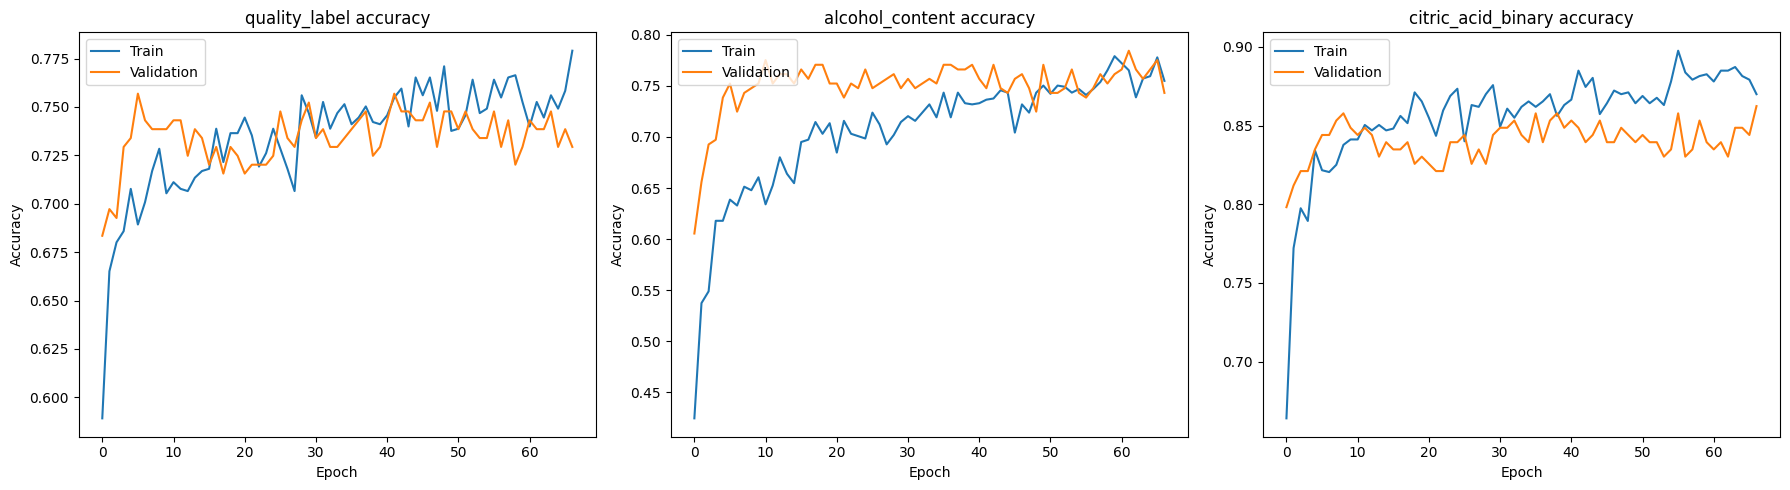

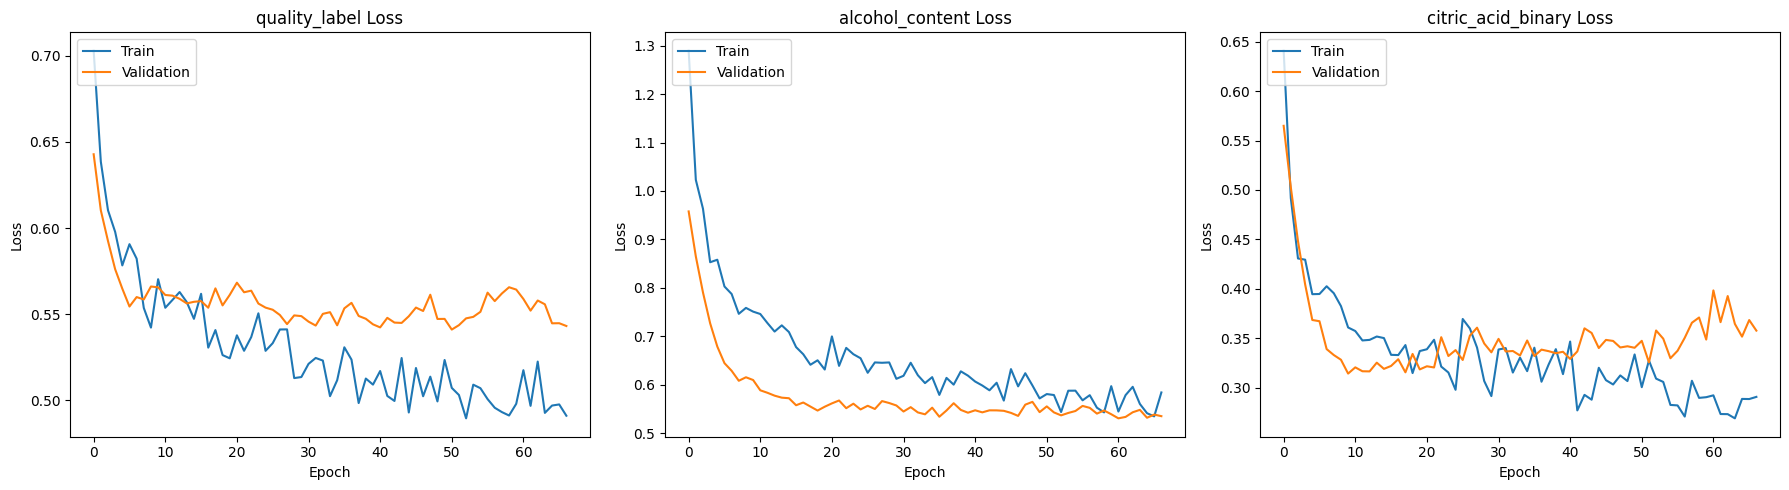

In [36]:
# Plot accuracy for each output

plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
plt.plot(history.history['quality_accuracy'])
plt.plot(history.history['val_quality_accuracy'])
plt.title('quality_label accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 3, 2)
plt.plot(history.history['alcohol_accuracy'])
plt.plot(history.history['val_alcohol_accuracy'])
plt.title('alcohol_content accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 3, 3)
plt.plot(history.history['citric_acid_accuracy'])
plt.plot(history.history['val_citric_acid_accuracy'])
plt.title('citric_acid_binary accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

# Plot loss for each output

plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
plt.plot(history.history['quality_loss'])
plt.plot(history.history['val_quality_loss'])
plt.title('quality_label Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 3, 2)
plt.plot(history.history['alcohol_loss'])
plt.plot(history.history['val_alcohol_loss'])
plt.title('alcohol_content Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 3, 3)
plt.plot(history.history['citric_acid_loss'])
plt.plot(history.history['val_citric_acid_loss'])
plt.title('citric_acid_binary Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()